# Football matches results prediction - 2nd submission

**Notebook content** :

This notebook corresponds to the 2nd submission of my project. It will contain, as in the 1st Submission notebook, a text text introduction to the project. The rest of the notebook contains more technical details about the different project aspects, code and illustratiions. The notebook only contains important parts of the code, necessary for the reader understanding. The full code can be found in 2 notebooks dealing with different aspects of my work (1st_submission_nb.ipynb for data analysis and features extraction and modelization_nb.ipynb for the modelization part). Technical issues are discussed directly inside the notebook.

**Introduction**

In this project I will work on **football Premier League (England Football league) games results prediction**. Few reasons made me work on that topic. I am football fan and also passionated by the area of statistical modelling and prediction. Working on this topic was a good opportunity to join these two interest areas ; beating the bookmakers is a bonus !

Here, what exactly do we want to predict ? For each game, we will predict **3 probabilities** : probability that the home team wins, probability that the result is a draw and probability that the home team loses the match. These predicted probabilities could be useful in 2 ways : 

- evaluating our models accuracies by forecasting the result of each match, which will be associated to the biggest predicted probability
- simulating betting processes and deciding what is the best betting strategy for each math (given our predicted result probabilities).

	For this project, different Ipython Notebooks have been produced : 
- 1st_submission_nb, about Data integration and preprocessing, Features engineering, pre-modelization Data analysis and vizualization
- modelization_nb, about modelization.
- 2nd submission_nb, that is an abstract of the first 2 notebooks and containing only important part of the explanations and Python code.

Code, figures, analysis and data analysis/modeling conclusions are provided directly in the notebook.
  


**I\ Sociological analysis of the problem**

In order to predict correctly a game result, we need to know **which factors tend to influence these results**. Many studies, that tackled the subject from the sociological or statistical points of view aimed to identify different factors strongly influencing the result of professional football games : 

- **Home advantage** : figures from many different leagues can prove it. Football teams win more games when they play « at home » than when they play away. Can the distance traveled by a team to play away influence the match result ? Different works tried to prove it, and found a link between distance traveled and matches results. 


- **Previous results** : previous results of a team tend to affect the future results of a team. Indeed, for a football team getting good results is an important good form sign and/or can give a psychological advantage to its players. The term « previous results »  can have a lot of meanings. Is it related to very recent results ? (the last 1, 2, 3 results) To recent results ? (10 last results for example) To season results (results of the season) ? To long term results ? (results of the season plus results of past seasons). In fact, all these meanings can interest us for predicting games results and we will analyze all of them.


- **Teams ranks** : team rank is correlated to the team season results but classical ranking systems give much more points to wins than to draws or defeats and consequently can't be a really good indicator for teams forms. Other ranking systems like the Elo ranking system can give more realistic results by taking into account for each match the level differences between teams and potentially the goals differences of games. I will give more details about this ranking system in the notebook corresponding part.


- **Matches importance** : there is a clear evidence for example that the last season match won't have the same importance for a middle ranked team and for teams that could leave the 1st league or miss European qualifying places without a victory. Nevertheless, matches importance seems quite difficult to modelize and could be very time-consuming for uncertained relevant results.  


- **Other competitions influences** : when a team has to play for other competitions during the regular league (national competitions like League Cup or FA cup in England or Europe competitions Europa League and Champions League), it can have different effects on its regular league results. On one hand, by forcing the team to play lots of games in short time periods, the team could be less competitive. On the other hand, having good results in others competitions, can be a motivation source, a psychological bonus for players. 


- **Number of days since last match** (teams tiredness) : in link with the previous influence factor, there is chance that a team playing lots of games in short time periods loses a few competitivity.


- **Global quality of the players on the field** : there is clear link between the global quality of a team on the field and its results. But how do we measure this quality ? Some popular games (Fifa, Football Manager, PES) provide relevant informations and notes about different qualities of thousand of professional players. One important problem remains : teams compositions data are really hard to find for past seasons and thus such features can't and won't be integrated to the models. Moreover, we could think of statistically modelizing players importance given teams compositions and teams results.


- **Important players injuries** : also linked to the previous factor.


- **Club and team global atmosphere** can influence the team result but is complicated to analyze and measure.


- **Pre-match experts analysis** : a complex prediction model could integrate data from a very large range of data sources (sports websites articles like Eurosport, news websites like BBC, twitter, etc) to produce interesting features.   

**II\ Statistical approaches and methods**

Literature about the subject distinguishes two classes of methods for forecasting sport matches results : 

- **forecasting the number of goals for the two teams** (and then if needed deriving the result from this). This method mainly focuses on the analysis of teams attack and defence and consequently needs data on the exact scores of all games, which can be more difficult to difficult to get.

- **forecasting win, drawn and loss probabilities directly** : this is the method I have chosen for this work. According to Goddard (2007), it gives similar results to the previous one but needs less data to analyze and can integrate other predictors easily. 

I have gathered data from different sources corresponding to Premier League matches result from 2005/2006 season to 2014/2015 season, FA Cup match results (same time period), League Cup (same time period) and European Cups results (only few recent seasons available) : 
    
    
- Premier league data : http://www.football-data.co.uk/englandm.php
- FA Cup Data : https://github.com/jalapic/engsoccerdata
- League Cup data : http://www.oddsportal.com/soccer/england/capital-one-cup-2013-2014/results/
- European Cups data : https://github.com/openfootball/



I am planning to **predict probabilities for Home Team result (Win, Draw and Loss)**. Consequently, all the predictors used in the models I will construct will be **team specific** (home team or away team). In this way, by distinguishing home team from away team, the model will directly incorporate the home team advantage. A typical input will consist in a set of home team specific features, a set of away team specific features (possibly not the same) and a set of “mixed” features based on data from both teams. 

This problem is a **3-class classification problem**. In this case, we are more interested in the 3 predicted probabilities than the predicted class in itself : indeed, we will need these probabilities for our simulated bets. Hence, **we need an algorithm that outputs probabilities associated to each class**. **We also need and algorithm that could ideally deal with ordered class** : in our problem the three classes don't have the same meaning or role. We want our model to exhibit only two boundaries : one between victory and draw and the other one between draw and defeat. A boundary between victory class and defeat class won't have much sense insofar as matches results are concerned !

Finally, I am planning to use three class of predictors extracted from the data I could retrieve :
   
    
- **Past performance features** : at time t, these features account for teams results before time t, past short term results and past long term feature (Elo score).
-  **Teams tiredness** : at a specific time t when a team plays a match, this feature will give information about the number of days passed since the last match of the team.
- **other types of predictors have not been retained** here because of a lack of homogeneity in the data gathered (data are only available for few recent years) or because data was simply not available.

More specific technical issues about features extraction, modelization or data analysis are discussed directly inside each corresponding notebook part.

**Notebook organization**

I\ Data integration, preprocessing and feature engineering 

II\ Short data analysis

III\ Modelization and models optimization

IV\ Results

In [2]:
#import needed Python libraries
import numpy as np
import csv
import random
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scistats
import math
import pylab
import statsmodels as sm

#graphics parameters of the notebook
# display graphs inline
%matplotlib inline

# Make graphs prettier
pd.set_option('display.max_columns', 15)
pd.set_option('display.line_width', 400)
pd.set_option('display.mpl_style', 'default')

# Make the fonts bigger
plt.rc('figure', figsize=(14, 7))
plt.rc('font', family='normal', weight='bold', size=15)

line_width has been deprecated, use display.width instead (currently both are
identical)



/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


# I\ Data integration, preprocessing and feature engineering 

### 1st League Data integration

In [13]:
#inegrate data from 2006-2007 to 2014-2015 seasons from different files
data_14_15 = pd.read_csv("./data/2014_2015.csv", parse_dates=True)
data_13_14 = pd.read_csv("./data/2013_2014.csv", parse_dates=True)
data_12_13 = pd.read_csv("./data/2012_2013.csv", parse_dates=True)
data_11_12 = pd.read_csv("./data/2011_2012.csv", parse_dates=True)
data_10_11 = pd.read_csv("./data/2010_2011.csv", parse_dates=True)
data_09_10 = pd.read_csv("./data/2009_2010.csv", parse_dates=True)
data_08_09 = pd.read_csv("./data/2008_2009.csv", parse_dates=True)
data_07_08 = pd.read_csv("./data/2007_2008.csv", parse_dates=True)
data_06_07 = pd.read_csv("./data/2006_2007.csv", parse_dates=True)
data_05_06 = pd.read_csv("./data/2005_2006.csv", parse_dates=True)
data_04_05 = pd.read_csv("./data/m2004_2005.csv", parse_dates=True)
data_03_04 = pd.read_csv("./data/m2003_2004.csv", parse_dates=True)
data_02_03 = pd.read_csv("./data/m2002_2003.csv", parse_dates=True)
data_01_02 = pd.read_csv("./data/m2001_2002.csv", parse_dates=True)

data_02_03.loc[:,'Date'] = data_02_03.Date.map(lambda x: x[0:6] + x[8:])

#integrate data in a single df
raw_data = pd.concat([data_14_15, data_13_14, data_12_13,
                      data_11_12, data_10_11, data_09_10,
                      data_08_09, data_07_08, data_06_07, 
                      data_05_06, data_04_05, data_03_04, 
                      data_02_03, data_01_02])

### Basic data manipulation and basic features construction
- Date conversion
- DataFrame sorting
- MatchId feature
- Season Feature
- HomeTeamDay, AwayTeamDay, HomeTeamHomeDay, AwayTeamAwayDay features
- Result conversion (to ordinal result, "away" result, etc.)

In [14]:
#Select useful features for datavisualization and analysis purposes
E0_data = raw_data[["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG",
                    "FTR", "HTAG", 'B365A', 'B365D', 'B365H', 'BSA', 
                    'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'GBA', 'GBD',
                    'GBH', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH',
                    'PSA', 'PSD', 'PSH', 'SBA', 'SBD', 'SBH', 'SJA',
                    'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA','WHD', 'WHH']]

#convert date format to YYYY-MM-DD classic format
E0_data.Date = E0_data.Date.map(lambda x : "20" + x[6:8] + "-" + x[3:5] + "-" + x[0:2])

#sort data by date
E0_data.sort('Date', inplace=True)

#reset data indexes
E0_data = E0_data.reset_index(drop=True)

#create matchID column
E0_data['matchID'] = E0_data.index

#create season feature
E0_data['Season'] = 0
E0_data.Season = E0_data.Date.map(lambda x : int(x[0:4]) if int(x[5:7]) > 6 else int(x[0:4]) - 1)

#null values test
E0_data.isnull().any()

#create teams list
teams = E0_data['HomeTeam'].unique()
print(teams)

#create seasons list
seasons = np.sort(E0_data['Season'].unique())
print(seasons)

#create dictionary containing teams list by season
teams_by_season = {season : E0_data[E0_data['Season'] == season]['HomeTeam'].unique() for season in seasons}

['Charlton' 'Derby' 'Leeds' 'Leicester' 'Liverpool' 'Middlesbrough'
 'Sunderland' 'Tottenham' 'Chelsea' 'Man United' 'Everton' 'Arsenal'
 'Bolton' 'Ipswich' 'Blackburn' 'Fulham' 'Southampton' 'West Ham'
 'Aston Villa' 'Newcastle' 'Birmingham' 'Man City' 'Middlesboro'
 'West Brom' 'Portsmouth' 'Wolves' 'Norwich' 'Crystal Palace' 'Wigan'
 'Reading' 'Sheffield United' 'Watford' 'Hull' 'Stoke' 'Burnley'
 'Blackpool' 'QPR' 'Swansea' 'Cardiff']
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [15]:
#match day feature construction for HomeTeam and AwayTeam (1st match of a season --> 1, last --> 38 because 20 team play by season)
E0_HT_grpby = E0_data.groupby('HomeTeam')[['Date']]
E0_AT_grpby = E0_data.groupby('AwayTeam')[['Date']]

def fxyH(row):
    x = row['HomeTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

def fxyA(row):
    x = row['AwayTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

E0_data['HomeTeamDay'] = E0_data.apply(fxyH, axis=1)
E0_data['AwayTeamDay'] = E0_data.apply(fxyA, axis=1)

E0_data['ones'] = 1
for season in seasons:
    for team in teams_by_season[season]:
        sH = E0_data[(E0_data['HomeTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sH.index, 'HomeTeamHomeDay'] = sH.cumsum()
        
        sA = E0_data[(E0_data['AwayTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sA.index, 'AwayTeamAwayDay'] = sA.cumsum()

In [16]:
def resultConverter(A):
    if A == 'H':
        return 'W'
    elif A =='A':
        return 'L'
    else:
        return 'D'

def resultInverser(A):
    if A == 'W':
        return 'L'
    elif A == 'L':
        return 'W'
    else:
        return 'D'
def ordinalResultConverter(A):
    if A == 'W':
        return 1
    elif A == 'L':
        return 0
    else:
        return 0.5
    
#make dummies variables for FTR (result of match), HW = Home Win, AW = Away Win, D = draw
E0_data['HW'] = E0_data.FTR.map(lambda x : 1 if x == 'H' else 0)
E0_data['AW'] = E0_data.FTR.map(lambda x : 1 if x == 'A' else 0)
E0_data['D']= E0_data.FTR.map(lambda x : 1 if x == 'D' else 0)

#make 2 different variable for the result of a match : 1 for the home team point of view, the other for the away team pt of view
E0_data['HR'] = E0_data.FTR.map(lambda x : resultConverter(x))
E0_data['AR'] = E0_data.HR.map(lambda x : resultInverser(x))

#make ordinal variable for the home team point of view result (1 = win, 0.5 = Draw, 0 = loss)
E0_data['ordinalHR'] = E0_data.HR.map(lambda x : ordinalResultConverter(x))

### Past performances features extraction

Features modelling and capturing past performances

For each day d and team t if t is currently playing in EO for season s corresponding to d : 
- Elo Ranking for each team depending on date

- 1_LastHTW : 1 if home team wins last match else 0, computed thanks to Pandas Series.diff routine
- 2_lastHTW : 1 if home team wins 2nd last match else 0
- 3_lastHTW : 
- 1_LastHTD : 1 if home team draws last match else 0, computed thanks to Pandas Series.diff routine
- 2_lastHTD :
- 3_lastHTD : 
- 1_lastHTWH : 1 if home team wins last home match
- 2_lastHTWH :

- 1_lastATW : 1 if away team wins last match, else 0
- 2_lastATW : 
- 3_lastATW : 
- 1_lastATD : 1 if away team draws last match, else 0
- 2_lastATD : 
- 3_lastATD : 
- 1_lastATWA : 1 if away team wins last away match 
- 2_lastATWA : 

- 7_HTW_rate : 7 last match HT Wins rate, computed thanks to Pandas Series.diff routine on season specific series
- 12_HTW_rate : 12 last match HT Wins rate
- 7_HTD_rate : 7 last match HT Draws rate
- 12_HTD_rate : 12 last match HT Draws rate

- 7_ATW_rate : 7 last match AT Wins rate, computed thanks to Pandas Series.diff routine on season specific series
- 12_ATW_rate : 12 last match AT Wins rate
- 7_ATD_rate : 7 last match AT Draws rate
- 12_ATD_rate : 12 last match AT Draws rate

- 5_HTHW_rate : 5 last matches HT Wins at home rate 
- 5_ATAW_rate : 5 last matches AT wins away rate
    
- HTW_rate : Home team wins rate from the beginning of the current season
- HTD_rate : Home team draw rate ...
- HTL_rate : ...
- ATW : Away team wins rate from the beginning of the season
- ATD
- ATL

- HTHW : Home team "wins at home" rate from the beginning of the season
- HTHD
- HTHL
- ATAW : Away team "wins away" rate from the beginning of the season
- ATAD
- ATAL

--> more than 38 features !

In a first time, we just need to store the past results in one variable (for features corresponding to 1 past match). We will make all needed dummies variables as described previously for the modelling part. 

In [17]:
grp_by_HT = E0_data.groupby('HomeTeam')
grp_by_AT = E0_data.groupby('AwayTeam')

grp_by_HT_and_season = E0_data.groupby(['HomeTeam', 'Season'])
grp_by_AT_and_season = E0_data.groupby(['AwayTeam', 'Season'])

#past performance features engineering
for team in teams:
    
    #we retrieve results series of the team
    teamHomeResults_s = grp_by_HT.get_group(team)['HR']
    teamAwayResults_s = grp_by_AT.get_group(team)['AR']
    #combine these 2 series and sort the obtained serie
    teamResults_s = pd.concat([teamHomeResults_s, teamAwayResults_s]).sort_index()

    #(i) compute k_last_HR and k_last_AR --> 6 features
    lag1TeamResults_d = teamResults_s.shift(1).to_dict()
    lag2TeamResults_d = teamResults_s.shift(2).to_dict()
    lag3TeamResults_d = teamResults_s.shift(3).to_dict()
    
    #k_last_HTR and k_last_ATR are just shifted versions of the results series
    E0_data.loc[teamHomeResults_s.index,'1_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'3_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'3_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    
    #(ii) Compute k_last_HTRH and k_last ATAR --> 4 features
    #we need here to diferentiate home results and past results. Python dictionaries allows the program to access to
    #needed data faster than with a Pandas serie
    lag1TeamHomeResults_d = teamHomeResults_s.shift(1).to_dict()
    lag2TeamHomeResults_d = teamHomeResults_s.shift(2).to_dict()
    lag1TeamAwayResults_d = teamAwayResults_s.shift(1).to_dict()
    lag2TeamAwayResults_d = teamAwayResults_s.shift(2).to_dict()
    
    E0_data.loc[teamHomeResults_s.index,'1_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamHomeResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamHomeResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamAwayResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamAwayResults_d[x])
    
    #(iii) rates based features : we need to get only season specific results series (to avoid taking previous season results into season rates)
    for season in seasons:
        
        if team in teams_by_season[season]:
            #retrieve season specific results serie (1 win serie, 1 draw serie the loss  will be computed thanks to
            #the 2 others)
            teamHomeResultsW_s = grp_by_HT_and_season.get_group((team,season))['HW']
            teamAwayResultsW_s = grp_by_AT_and_season.get_group((team,season))['AW']
            teamResultsW_s = pd.concat([teamHomeResultsW_s, teamAwayResultsW_s]).sort_index()

            teamHomeResultsD_s = grp_by_HT_and_season.get_group((team,season))['D']
            teamAwayResultsD_s = grp_by_AT_and_season.get_group((team,season))['D']
            teamResultsD_s = pd.concat([teamHomeResultsD_s, teamAwayResultsD_s]).sort_index()
        
            #(0) compute HW rates, HL rates, AW rates, LW rates since begining of season
            teamResultsWCumul_d = teamResultsW_s.shift(1).cumsum().to_dict()
            teamResultsDCumul_d = teamResultsD_s.shift(1).cumsum().to_dict()

            #(i) compute 7_HTW_rate, 12_HTW_rate, 7_HTD_rate, 12_HTD_rate, 7_ATW_rate, 12_ATW_rate, 7_ATD_rate, 12_ATD_rate --> 8 features
            win7TeamResultsW_d = pd.rolling_mean(teamResultsW_s.shift(1), window = 7, min_periods = 4).to_dict()
            win12TeamResultsW_d = pd.rolling_mean(teamResultsW_s.shift(1), window = 12, min_periods = 4).to_dict()
            win7TeamResultsD_d = pd.rolling_mean(teamResultsD_s.shift(1), window = 7, min_periods = 4).to_dict()
            win12TeamResultsD_d = pd.rolling_mean(teamResultsD_s.shift(1), window = 12, min_periods = 4).to_dict()
        
            E0_data.loc[teamHomeResultsW_s.index,'HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'HTD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
        
            E0_data.loc[teamHomeResultsW_s.index,'7_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'12_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'7_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'12_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
        
            E0_data.loc[teamHomeResultsD_s.index,'7_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamHomeResultsD_s.index,'12_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'7_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'12_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])

        #(ii) compute 5_HTHW_rate and 5_ATAW_rate
        win5TeamResultsHomeW_d = pd.rolling_mean(teamHomeResultsW_s.shift(1), window = 5, min_periods = 1).to_dict()
        win5TeamResultsAwayW_d = pd.rolling_mean(teamAwayResultsW_s.shift(1), window = 5, min_periods = 1).to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'5_HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win5TeamResultsHomeW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'5_ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win5TeamResultsAwayW_d[x])
        
        #(iii) compute HTHW_rate, ATAW_rate, HTHD_rate, ATAD_rate
        teamHomeResultsCumulW_d = teamHomeResultsW_s.shift(1).cumsum().to_dict()
        teamHomeResultsCumulD_d = teamHomeResultsD_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulW_d = teamAwayResultsW_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulD_d = teamAwayResultsD_s.shift(1).cumsum().to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulW_d[x])
        E0_data.loc[teamHomeResultsW_s.index,'HTHD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulD_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulD_d[x])


        
#compute missing features k_XTL_rate thanks to the k_XTW_rate and k_XTD_rate features
E0_data.loc[:,'7_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'12_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'7_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])
E0_data.loc[:,'12_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])

#compute missing HTL_rate, ATL_rate with features with the wins and draws features
E0_data.loc[:,'HTW_rate'] = E0_data['HTW_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATW_rate'] = E0_data['ATW_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTD_rate'] = E0_data['HTD_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATD_rate'] = E0_data['ATD_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTL_rate'] = 1 - (E0_data['HTW_rate'] + E0_data['HTD_rate'])
E0_data.loc[:,'ATL_rate'] = 1 - (E0_data['ATW_rate'] + E0_data['ATD_rate'])

#we finish to compute HTHW_rate, ..., ATAD_rate features and compute corresponding loss features
E0_data.loc[:,'HTHW_rate'] = E0_data['HTHW_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAW_rate'] = E0_data['ATAW_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHD_rate'] = E0_data['HTHD_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAD_rate'] = E0_data['ATAD_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHL_rate'] = 1 - (E0_data['HTHW_rate'] + E0_data['HTHD_rate'])
E0_data.loc[:,'ATAL_rate'] = 1 - (E0_data['ATAW_rate'] + E0_data['ATAD_rate'])

### Elo ranking feature extraction

Elo ranking method is a method often used to rank competitors in huge competitions (with hundreds of competitors and more). It was originally designed by Arpad Elo (1978) and used to assess skills differences professional chess players. 

In the ELO rating system the match result is classified with a score system where a win gives a score of 1, a draw gives a score of 0.5 and a loss gives a score of 0 for the home team participating in the match. Let $\alpha_H$ and $\alpha_A$
represent  the  scores  of the home and away teams respectively. Therefore : 

$$\alpha_H=\begin{cases}
               1\ if\ the\ home\ team\ won\\
               0.5\ if\ the\ match\ was\ drawn\\
               0\ if\ the\ home\ team\ lost
            \end{cases}$$
            
And away team score is $\alpha_A = 1 - \alpha_H$

This model relies on the fllowing principles : 
- at each time t when a match between 2 competitors occurs : an estimation for the score $\alpha_H$ (and $\alpha_A$) is produced given the difference of the performances ratings (Elo score at time t before the match) of the 2 competitors.
- after the match, the 2 competitors performances ratings are updated given the difference between the actual result and the estimated result. Performances ratings are "less updated" when these 2 are close (difference ~ 0) than when these 2 are highly separated (difference ~ 1).

Let's introduce the following models notations : 

$l_0^H = the\ performance\ rating\ of\ the\ home\ team\ before\ the\ match\\
l_0^A = the\ performance\ rating\ of\ the\ away\ team\ before\ the\ match\\
l_1^H = the\ performance\ rating\ of\ the\ home\ team\ after\ the\ match\\
l_1^H = the\ performance\ rating\ of\ the\ home\ team\ after\ the\ match\\
\gamma_H = expected\ home\ result\ estimation\ for\ the\ match\\
\gamma_A = expected\ away\ result\ estimation\ for\ the\ match\\
k = update\ rate\ scaling\ parameter\\
c = 1st\ Elo\ score\ scaling\ parameter\\
d = 2nd\ Elo\ score\ scaling\ parameter$

Then, teams performances ratings before and after the match are linked by the following relationships : 

$$ \begin{cases}
               l_1^H = l_0^H + k(\alpha_H - \gamma_H)\\
               l_1^A = l_0^A + k(\alpha_A - \gamma_A)\\
\end{cases}$$
            
With $\gamma_H$ and $\gamma_A$ being : 
 
$$ \begin{cases}
               \gamma_H = \frac{1}{1 + c e^{\frac{(l_0^A - l_0^H)}{d}}}\\
               \gamma_A = 1 - \gamma_H = \frac{1}{1 + c e^{\frac{(l_0^H - l_0^A)}{d}}}\\
\end{cases}$$

Therefore, in our problem the $\gamma_H$ variable can be used as a predictor. c And d parameters are just scaling parameters for the Elo scores $l$ and don't affect the induced teams ranks. Nevertheless, the $k$ parameter is extremely important in this model since it is linked to the update quantity induced by a match in teams Elo scores. This parameter can be optimized to assess real teams ranks (given a specific objective score like correlation between $\gamma_H$ and real scores $\alpha_H$ or others) before constructing a predictive model or can be calibrated directly inside a model by cross validation. In their paper, Hvattum & Arntzen (2010) found that for $c = 10,\ d = 400$, $k = 20$ is the best k value that minimizes quadratic differences between $\gamma_H$ and $\alpha_H$.

I will use these parameters for the data analysis part.

Finally, at each season beginning, we need to give Elo scores to teams that didn't play the last season. Giving them their last previous Elo scores (before leaving the Premier League) can lead to underestimated scores (the team must have played well to come back to the Premier league) and is not always possible to get. In their paper, Ville Sillanpää & Olli Heino (2013) suggest taking the past season average Elo scores of the 3 last teams (in terms of Elo scores). As it is likely that this average Elo score can too underestimate Elo score of new incoming teams, I will give them the average Elo scores of the 4 previous season last teams. 

In [18]:
#Elo ranking method parameters
k = 20.0
d = 400.0
c = 10.0

#Initialization of output containers
ELO_dict = dict()
gammaHT_dict = dict()
gammaAT_dict = dict()

#intermediate data containers initilization
latest_update_d = dict() #contains latest updates in date of ELO_dict
prev_ELO_score_d = dict() #contains latest ELO_score given to a team for computing new one

prev_season_teams = [team for team in teams] #contains list of teams for the current season
last_teams_ELO_av = 0.0 #contains ELO average of last previous season teams

for team in teams:
    latest_update_d[team] = '2001-01-01'
    prev_ELO_score_d[team] = 0.0

for season in E0_data.Season.unique():
    season_match_dates = E0_data[E0_data['Season'] == season].Date.unique()
    season_teams = E0_data[E0_data['Season'] == season].HomeTeam.unique()
    last_season_date = season_match_dates[len(season_match_dates) - 1]
    
    for Steam in season_teams:
        if not (Steam in prev_season_teams):
            prev_ELO_score_d[Steam] = last_teams_ELO_av
            
    for date in season_match_dates:
        for team in teams:
            if not ((team in E0_data[E0_data['Date'] == date]['HomeTeam'].values) | (team in E0_data[E0_data['Date'] == date]['AwayTeam'].values)):
                ELO_dict[(team, date)] = prev_ELO_score_d[team]
                latest_update_d[team] = date
            else:
                if latest_update_d[team] < date:
                    Hteam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['HomeTeam'].values[0]
                    Ateam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['AwayTeam'].values[0]
            
                    l0H = prev_ELO_score_d[Hteam]
                    l0A = prev_ELO_score_d[Ateam]
                    gammaH = 1.0/(1.0 + c**((l0A - l0H)/d))
                    gammaA = 1.0 - gammaH
                    alphaH = E0_data[(E0_data['Date'] == date) & (E0_data['HomeTeam'] == Hteam)]['ordinalHR'].values[0]
                    alphaA = 1 - alphaH
            
                    #compute new scores
                    new_HT_ELO_score = l0H + k * (alphaH - gammaH)
                    new_AT_ELO_score = l0A + k * (alphaA - gammaA)

                    #put new scores in ELO_dict
                    ELO_dict[(Hteam, date)] = new_HT_ELO_score
                    ELO_dict[(Ateam, date)] = new_AT_ELO_score
                    gammaHT_dict[(Hteam, date)] = gammaH
                    gammaAT_dict[(Ateam, date)] = gammaA
                    latest_update_d[Hteam] = date
                    latest_update_d[Ateam] = date
            
                    #update prev_ELO_score_d and latest_update_d
                    prev_ELO_score_d[Hteam] = new_HT_ELO_score
                    prev_ELO_score_d[Ateam] = new_AT_ELO_score
        
        if date == last_season_date:
            ELOs = np.array([prev_ELO_score_d[Steam] for Steam in season_teams])
            ELOs.sort()
            last_teams_ELO_av = np.mean(ELOs[0:-17])
            prev_season_teams = season_teams
            
            #make HTeamEloScore, ATeamEloScore and gammaHome features from previously computed dictionaries

def HomeTeamEloScore(row):
    return ELO_dict[(row['HomeTeam'], row['Date'])]

def AwayTeamEloScore(row):
    return ELO_dict[(row['AwayTeam'], row['Date'])]

def gammaHTeamDate(row):
    return gammaHT_dict[(row['HomeTeam'], row['Date'])]

#compute resulting Elo scores important features
E0_data.loc[:,'HTeamEloScore'] = E0_data.apply(HomeTeamEloScore, axis=1) 
E0_data.loc[:,'ATeamEloScore'] = E0_data.apply(AwayTeamEloScore, axis=1) 
E0_data.loc[:,'gammaHome'] = E0_data.apply(gammaHTeamDate, axis=1)

### Team tiredness feature extraction

This feature corresponds (for all match) to the number of days that a team (Home or Away) have passed without playing. Of course, as data from other competitions (national competitions, european competitions) have not been gathered, this feature is only computed from the League data.

In [29]:
for team in teams:
    homeMatchDates_s = E0_data[E0_data['HomeTeam'] == team]['Date']
    awayMatchDates_s = E0_data[E0_data['AwayTeam'] == team]['Date']
    matchDates_s = pd.concat([homeMatchDates_s, awayMatchDates_s]).sort_index()
    lastMatchDates_s = matchDates_s.shift(1)
    matchDates = matchDates_s.values
        
    E0_data.loc[E0_data['HomeTeam'] == team, 'HTLastMatchDate'] = E0_data.loc[E0_data['HomeTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    E0_data.loc[E0_data['AwayTeam'] == team, 'ATLastMatchDate'] = E0_data.loc[E0_data['AwayTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    
def HTdaysBetweenDates(row):
    if not (pd.isnull(row['HTLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['HTLastMatchDate'])
        ndays = (currDate - prevDate).days 
        if ndays < 20:
            return ndays
        else: 
            return np.nan
    else:
        return np.nan 
    
def ATdaysBetweenDates(row):
    if not (pd.isnull(row['ATLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['ATLastMatchDate'])
        return (currDate - prevDate).days
    else:
        return np.nan 
    
E0_data.loc[:, 'HTdaysSinceLastMatch'] = E0_data.apply(HTdaysBetweenDates, axis=1)
E0_data.loc[:, 'ATdaysSinceLastMatch'] = E0_data.apply(ATdaysBetweenDates, axis=1)
E0_data.loc[:,'DaysSinceLastMatchRate'] = E0_data['HTdaysSinceLastMatch'].astype(float)/E0_data['ATdaysSinceLastMatch'].astype(float)

### Binary predictors construction

Features to transform before modelization part : 
- k_last_HTR
- k_last_ATR
- k_last_HTHR
- k_last_ATAR

In [32]:
E0_data['1_last_HTR_isW'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTR_isL'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTR_isW'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTR_isL'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_HTR_isW'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_HTR_isL'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_ATR_isW'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATR_isL'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATR_isW'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATR_isL'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_ATR_isW'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_ATR_isL'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_HTHR_isW'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTHR_isL'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTHR_isW'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTHR_isL'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)

E0_data['1_last_ATAR_isW'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATAR_isL'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATAR_isW'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATAR_isL'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)

# II\ Short Data analysis

This part of the notebook has several purposes : 
    - getting a more complete vision about the predictors, their behaviours, their distributions, etc.
    - understanding how predictors and features are related, and especially how they are related to each others
    - understanding how predictors and features are related to the match results (also the class labels we will try to predict) and how they influence these results.
    
A more complete analysis can be found in the notebook 1st_submission_nb.ipynb    

### Visualization of simple lagged performance features on result of matches

Home wins, draws and home losses rates variations over seasons

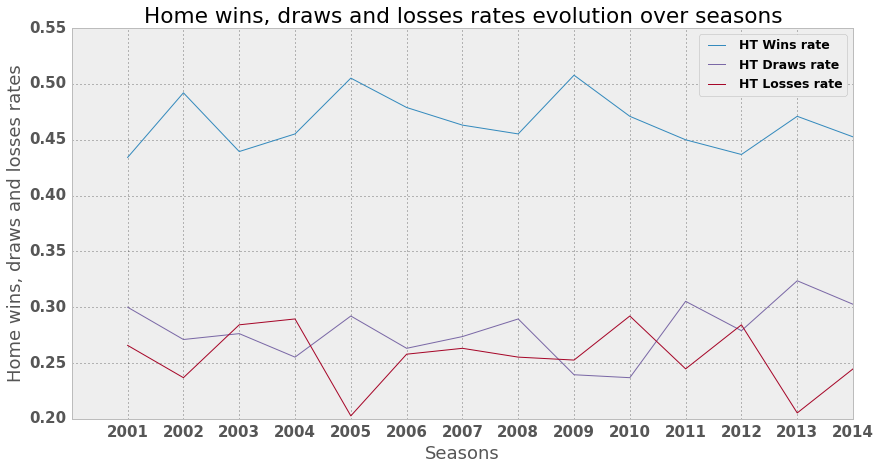

In [20]:
#Home wins, Away wins and draws rates variations over seasons
HW_rates = []
AW_rates = []
D_rates = []

for season in seasons:
    season_data = E0_data[E0_data['Season'] == season]
    total_matches_nb = len(season_data.index)
    HW_rate = float(len(season_data[season_data['FTR'] == 'H'].index))/float(total_matches_nb)
    AW_rate = float(len(season_data[season_data['FTR'] == 'A'].index))/float(total_matches_nb)
    D_rate = float(len(season_data[season_data['FTR'] == 'D'].index))/float(total_matches_nb)
    HW_rates.append(HW_rate)
    AW_rates.append(AW_rate)
    D_rates.append(D_rate)

plt.figure()
plt.plot(seasons, HW_rates, label="Home wins rate")
plt.plot(seasons, AW_rates, label="Away wins rate")
plt.plot(seasons, D_rates, label="Draw rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 1, fontsize='small')
plt.xticks([int(season) for season in seasons], seasons)
plt.xlabel("Seasons")
plt.ylabel("Home wins, draws and losses rates")
plt.title("Home wins, draws and losses rates evolution over seasons")

#global wins, draws and losses rates
HW_rate = float(len(E0_data[E0_data['HR'] == 'W'].index))/float(len(E0_data.index))
HL_rate = float(len(E0_data[E0_data['HR'] == 'L'].index))/float(len(E0_data.index))
HD_rate = float(len(E0_data[E0_data['HR'] == 'D'].index))/float(len(E0_data.index))
rates = [HW_rate, HL_rate, HD_rate]

Influence of the last home match result on the next result

--> By comparing the proportions of Home Wins, Draws and losses for different home/away previous matches results, we can observe the influence of such parameters on results.

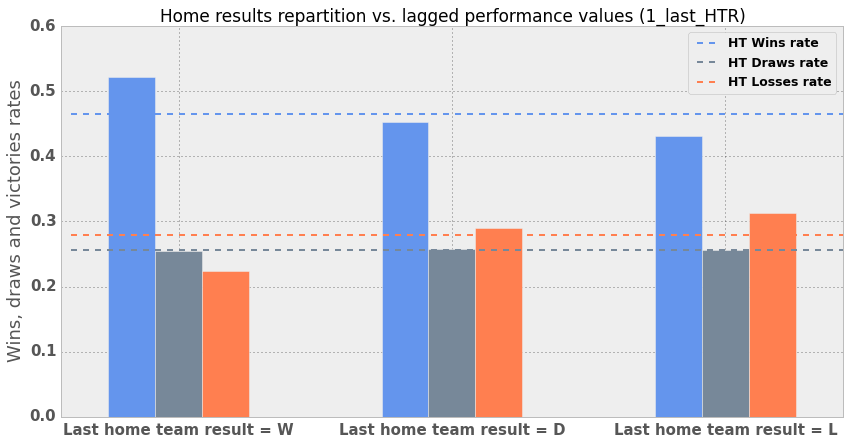

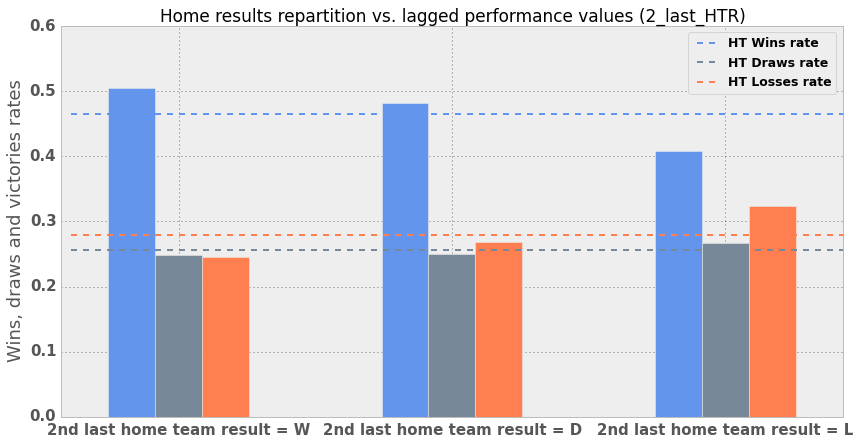

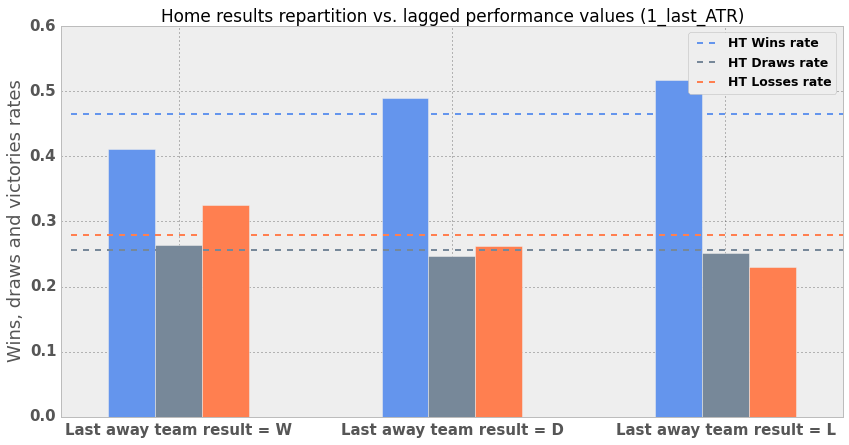

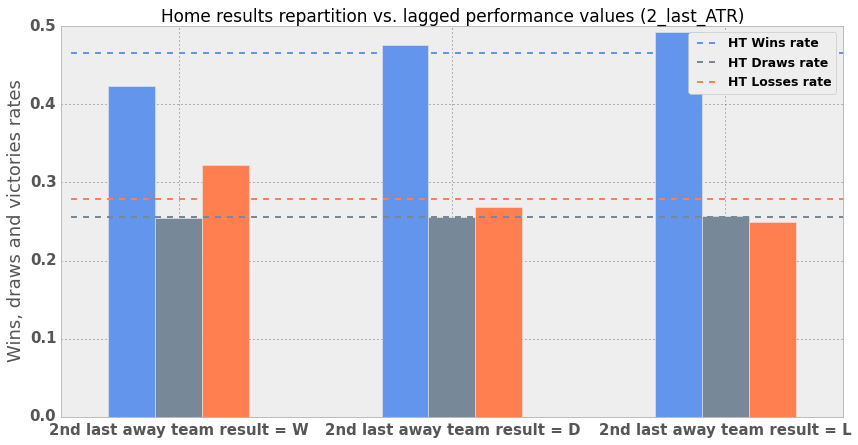

In [21]:
width = 0.12
xticks = np.array([0.3, 1.0, 1.7])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6']
xlabels = [["Last home team result = W", "Last home team result = D", "Last home team result = L"],
           ["2nd last home team result = W", "2nd last home team result = D", "2nd last home team result = L"],
           ["Last away team result = W", "Last away team result = D", "Last away team result = L"],
            ["2nd last away team result = W", "2nd last away team result = D", "2nd last away team result = L"]]

var_names = ['1_last_HTR', '2_last_HTR', '1_last_ATR', '2_last_ATR']
titles = ["Home results repartition vs. lagged performance values (" + var_name + ")" for var_name in var_names]

k=0
for var_name in var_names:
    
    fig = plt.figure()
    HW_rates = []
    HD_rates = []
    
    for Rvalue in ['W','D','L']:
        HW_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'W')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
        HD_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'D')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(xticks - 1.5 * width, HW_rates, width, color = '#6495ED')
    plt.bar(xticks - 0.5 * width, HD_rates, width, color = '#778899')
    plt.bar(xticks + 0.5 * width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 2.0), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 2.0), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 2.0), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
    pylab.xticks(xticks, xlabels[k])
    plt.ylabel("Wins, draws and victories rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 1, fontsize='small')
    plt.xlim(0.0, 2.0)
    plt.title(titles[k], fontsize=17)

    k += 1

It seems that results of previous matches tend to affect next results, even if this influence doesn't seem very "strong". This representation is available for all other variables in the other notebook.

### Visualization of complex lagged performance (results average) features on result of matches

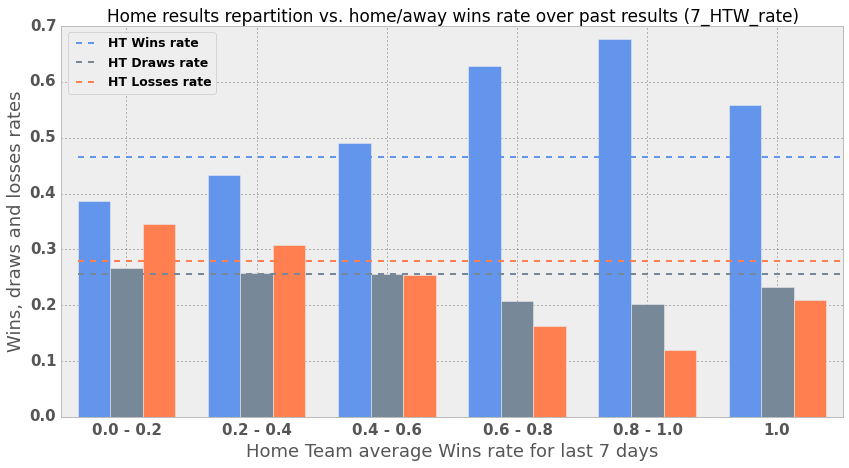

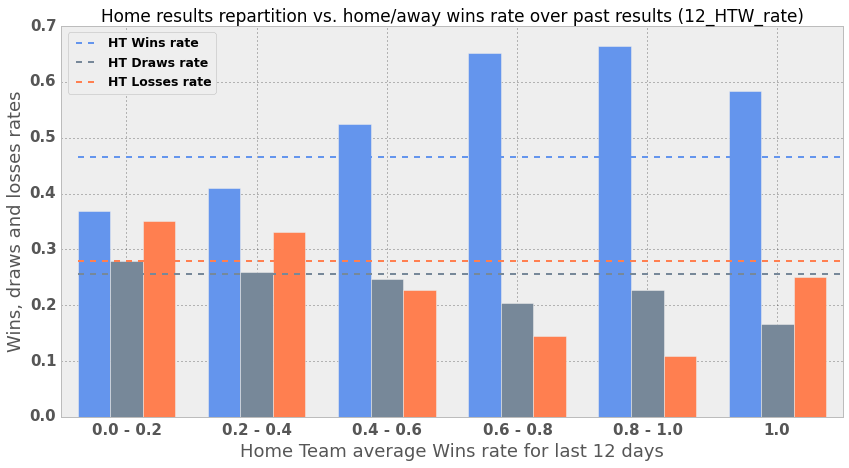

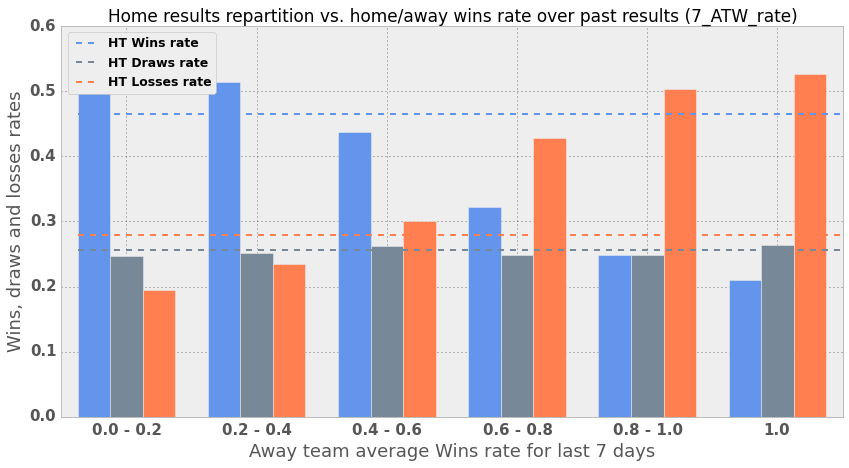

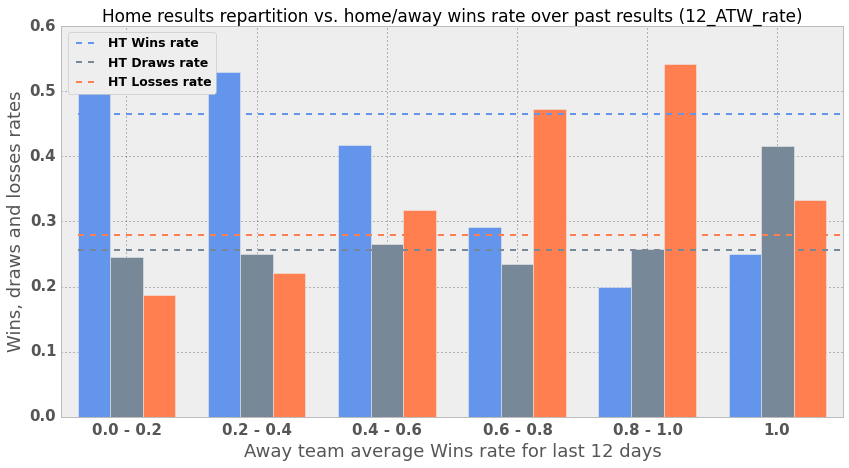

In [22]:
bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width = (0.2 - 0.05)/3.0
xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
xlabels = ["Home Team average Wins rate for last 7 days", "Home Team average Wins rate for last 12 days", 
          "Away team average Wins rate for last 7 days", "Away team average Wins rate for last 12 days"]    
var_names = ['7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate']
titles = ["Home results repartition vs. home/away wins rate over past results (" + var_name + ")" for var_name in var_names]


k=0
for var_name in var_names:
    
    fig = plt.figure()
    nonzero_bars = []
    nonzero_xticks = []
    HW_rates = []
    HD_rates = []
    
    for (bar, xtick) in zip(bars, xticks):
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzero_xticks.append(xtick)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(np.array(nonzero_xticks), HW_rates, width, color = '#6495ED')
    plt.bar(np.array(nonzero_xticks) + width, HD_rates, width, color = '#778899')
    plt.bar(np.array(nonzero_xticks) + 2*width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and losses rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
    plt.title(titles[k], fontsize=17)



    k += 1

As expected, a stronger relationship exists between aggrebated past results features and matches results. Nevertheless, this link doesn't seem very strong either.

### Elo rank feature visualization

To understand the behaviour of Elo Rank, the following cells present is distribution and a hitogram showing its influence on match results.

In [ ]:
plt.hist(E0_data['gammaHome'].values, bins=20)
plt.xlabel("gammaHome values")
plt.ylabel("Bins sizes")
plt.xlim(0,1)
plt.title("Elo score distribution histogram")

Let's have a look at team specific Elo score evolution over the first years...

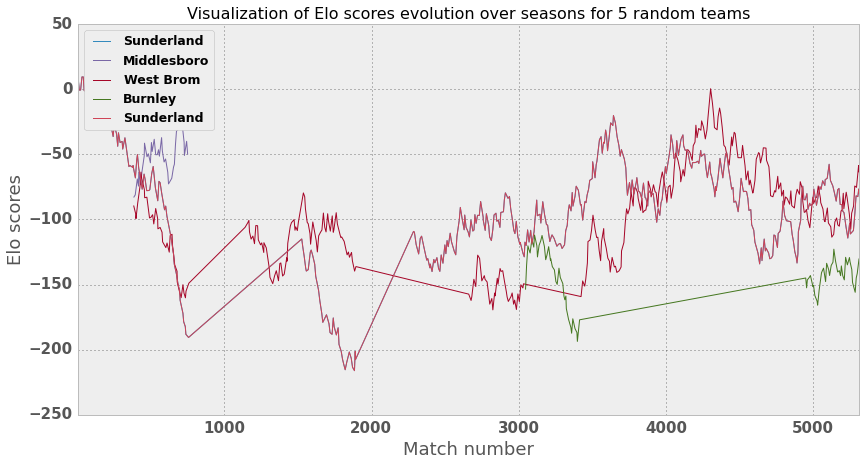

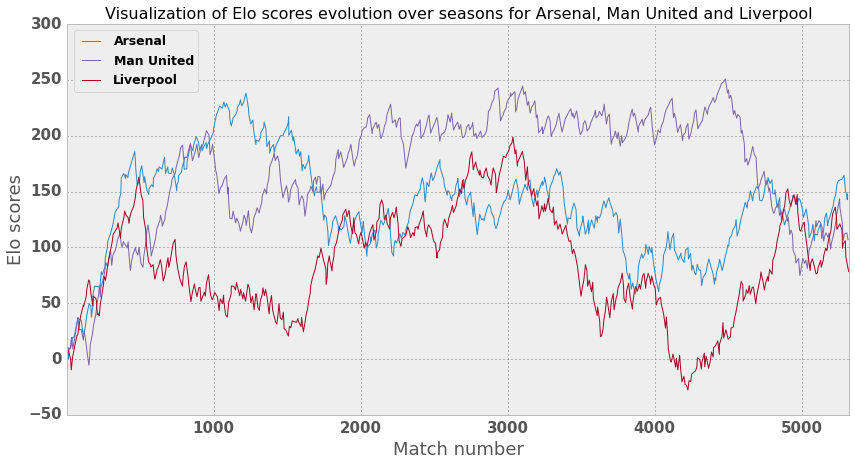

In [24]:
fig = plt.figure()
#random teams elo score visualization
random_teams = [teams[random.randint(0, len(teams))-1] for k in range(0,5)]
for team in random_teams:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(random_teams, 2, fontsize="small")
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for 5 random teams', fontsize = 16)
    
fig = plt.figure()
for team in ['Arsenal', 'Man United', 'Liverpool']:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(['Arsenal', 'Man United', 'Liverpool'], 2, fontsize='small')
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for Arsenal, Man United and Liverpool', fontsize=16)

**Conclusion** : it seems that at least **2 seasons are needed for teams Elo scores to get to their "normal values range"** (2 seasons = 2 * 380 matches). 

Now, let's have a look at the relationship between gammaHome score and match home result...

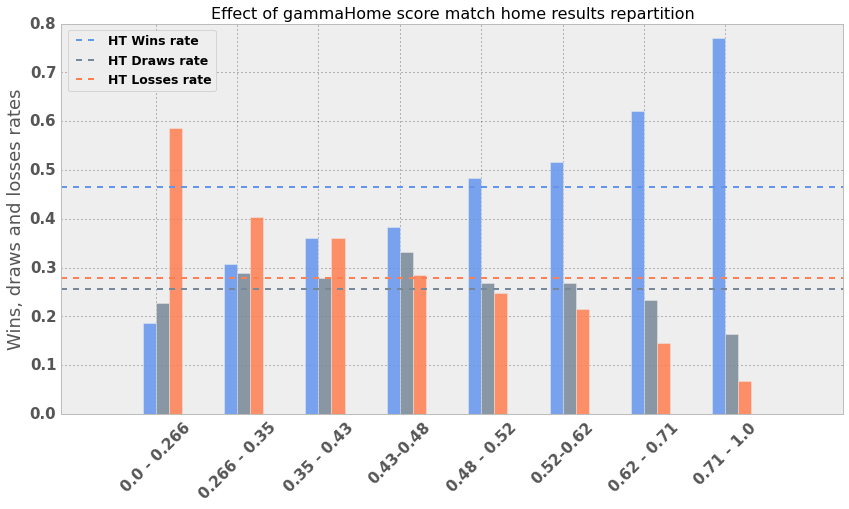

In [25]:
#we define bins of approximatively equal sizes in terms of Elo score
bars = [0.0, 0.266, 0.35, 0.43, 0.48, 0.52, 0.62, 0.71, 1.0]
bars_pos = [0.0 + k * (1.0/8.0) for k in range(1,9)]
width = 0.02
xticks = np.array([(bars[k+1] - bars[k])/2.0 for k in range(0, len(bars) - 1)])
xticksLabels = ['0.0 - 0.266', '0.266 - 0.35','0.35 - 0.43', '0.43-0.48', '0.48 - 0.52','0.52-0.62', '0.62 - 0.71', '0.71 - 1.0']
xlabels = ["Home Team average home-wins rate for last 5 days (at home)", "Away Team average away-wins rate for last 5 days (away)"]    

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bars) - 1):
    HW_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED', alpha = 0.85)
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899', alpha = 0.85)
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50', alpha = 0.85)

plt.plot((0.0, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
plt.xlim(0,1.2)
pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.title("Effect of gammaHome score match home results repartition", fontsize=16)

**Conclusion** : **Elo score seems to give very relevant information about the match result**. When gammaHome is high, home team wins about 80% of its home matches, whereas the inverse occurs when gammaHome is close to 0 (loses ~60% of its matches). When gammaHome is close to 0.5, results repartition is close to a uniform repartition (W = 38%, D = 33%, L = 29%)

### Days since last league match feature (team tiredness)

Let's have a look at influence of one of these features (HTdaysSinceLastMatch) over matches home results... 

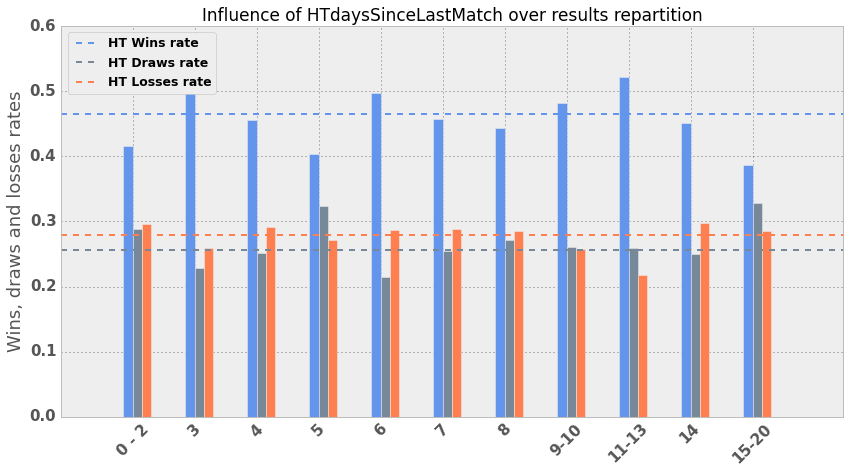

In [26]:
fig = plt.figure()

#we define bins of minimum size for HTdaysSinceLastMatch
bins = [0, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 21]
bars_pos = [0.0 + k * (20/12.0) for k in range(1,12)]
width = 0.25
xticksLabels = ['0 - 2', '3', '4', '5', '6', '7','8', '9-10', '11-13', '14', '15-20']

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bins) - 1):
    HW_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED')
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899')
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50')

plt.plot((0.0, 21), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 21), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 21), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
plt.xlim(0,21)
plt.title("Influence of HTdaysSinceLastMatch over results repartition", fontsize = 17)

**Conclusion** : **we can't see any evident relationship between HTdaysSinceLastMatch over match results**. This may be due to the fact that there is no existing correlation between these two of that this visualization is not correct. Moreover, when teams play lots of matches in short time periods, this is due to the fact that the team had other games in European competition or in National tournaments finals and thus indicates that the team is supposed to be a good or very good team. **That could explain why we almost observe the inverse of what we expected.**

### Correlation matrix visualization

In [30]:
E0_data_copy = E0_data[['HW', 'AW', 'D',
                        'gammaHome',
                        'DaysSinceLastMatchRate',
                        'HTW_rate', 'HTD_rate', 'HTL_rate',
                        'ATW_rate', 'ATD_rate', 'ATL_rate',
                        'HTHW_rate', 'HTHD_rate', 'HTHL_rate',
                        'ATAW_rate', 'ATAD_rate', 'ATAL_rate',
                        '1_last_HTR', '2_last_HTR',
                        '1_last_ATR', '2_last_ATR',
                        '1_last_HTHR', '2_last_HTHR',
                        '1_last_ATAR', '2_last_ATAR',
                        '7_HTW_rate', '12_HTW_rate', 
                        '7_ATW_rate', '12_ATW_rate', 
                        '7_HTL_rate', '12_HTL_rate', 
                        '7_ATL_rate', '12_ATD_rate',
                        '7_HTD_rate', '12_HTD_rate',
                        '7_ATD_rate', '7_ATD_rate',
                       '5_HTHW_rate', '5_ATAW_rate']]

#make dummies variables for the past results indicators features (3 for W, D and L)
E0_data_copy.loc[:, '1_last_HTRisW'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTRisD'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTRisL'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTRisW'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTRisD'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTRisL'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATRisW'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATRisD'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATRisL'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATRisW'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATRisD'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATRisL'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0)

E0_data_copy.loc[:, '1_last_HTHRisW'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTHRisD'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTHRisL'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTHRisW'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTHRisD'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTHRisL'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATARisW'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATARisD'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATARisL'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATARisW'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATARisD'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATARisL'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)

#under matrix form
corr = E0_data_copy.corr()
corr

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,HW,AW,D,gammaHome,DaysSinceLastMatchRate,HTW_rate,HTD_rate,...,2_last_HTHRisL,1_last_ATARisW,1_last_ATARisD,1_last_ATARisL,2_last_ATARisW,2_last_ATARisD,2_last_ATARisL
HW,1.000000,-0.580399,-0.546598,0.350052,-0.023591,0.194665,-0.017785,...,-0.056098,-0.078285,0.007399,0.060232,-0.066099,-0.010169,0.064637
AW,-0.580399,1.000000,-0.364672,-0.338890,0.018556,-0.167644,0.020609,...,0.053177,0.087133,-0.021814,-0.056835,0.090869,-0.000421,-0.075497
D,-0.546598,-0.364672,1.000000,-0.051775,0.007909,-0.050324,-0.000842,...,0.009461,-0.000087,0.013972,-0.010426,-0.017863,0.012061,0.003727
gammaHome,0.350052,-0.338890,-0.051775,1.000000,-0.065609,0.550287,-0.074755,...,-0.199997,-0.240771,-0.000098,0.209789,-0.219064,-0.027365,0.207245
DaysSinceLastMatchRate,-0.023591,0.018556,0.007909,-0.065609,1.000000,-0.028450,0.022458,...,0.017973,0.012751,-0.020937,0.008648,-0.025225,0.017387,0.008918
HTW_rate,0.194665,-0.167644,-0.050324,0.550287,-0.028450,1.000000,-0.331593,...,-0.241232,-0.001496,0.009855,-0.005086,-0.003072,-0.007473,0.022766
HTD_rate,-0.017785,0.020609,-0.000842,-0.074755,0.022458,-0.331593,1.000000,...,-0.070442,0.002091,0.012692,-0.002157,0.011332,0.012399,-0.009721
HTL_rate,-0.181153,0.152409,0.050528,-0.495448,0.012991,-0.767283,-0.350600,...,0.287353,0.000064,-0.018410,0.006516,-0.004653,-0.001010,-0.015991
ATW_rate,-0.186506,0.200647,0.007025,-0.549355,0.047360,0.050846,0.010050,...,0.005287,0.385646,-0.071142,-0.280846,0.344567,-0.054092,-0.248153
ATD_rate,0.046877,-0.052818,0.000688,0.105535,-0.004151,0.041101,0.083848,...,0.009030,-0.153027,0.283953,-0.103852,-0.127566,0.225025,-0.068294


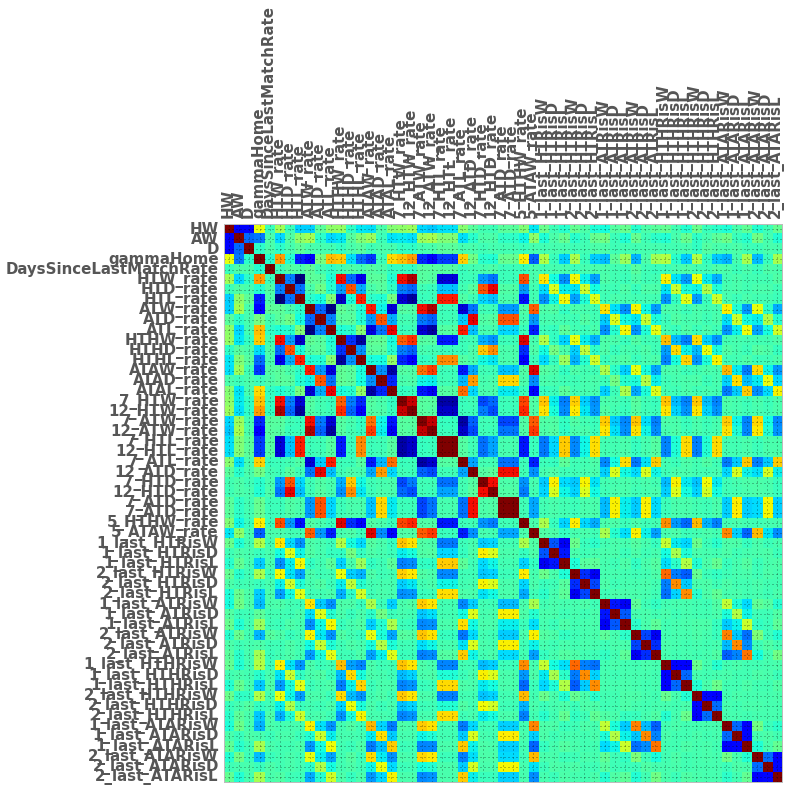

In [31]:
#and in a more understandable and graphical form
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(E0_data_copy)

## Conclusion

Only a few predictors (gammaHome and long term wins/losses rates) seem to carry relevant information for predicting the results of England League football matches.

Moreover, all predictors show very important correlation between each other, hence carry all more or less the same information. This can be a problem when fitting models because this tends to make the training procedure instable.

Modelization part will be difficult because different technical challenges must be faced to obtain relevant and satisfactory results.

# III\ Modelization

The goal of this part is to find a good way to modelize matches results given our pool of predictors (which is quite large) by answering these questions : 

- which kind/families of models have to be considered for this classification problem ?
- Among one family of classifier, which set of metaparameter give the best classifier ? In terms of which error score ?
- How can we compare different models ? Which ones are the better ? 

Here, all classifier must at least give an estimation of the probabilities associated to all predicted observations. For its simplicity and interpretability, I chose to train 2 classifier based on logistic regression model : 
- ordinal logistic regression model dealing with ordinal classes
- multiclass logistic regression model taking the problem as a simple multinomial logistic regression

In order to capture other than linear and additive patterns in the data, I also chose to train RandomForrest classifier. 

**This gives us 3 models families.**

First, let's start by dividing our dataset into three part :
- a first group of observations useful for the teams Elo ranks to converge to stable values. Models won't use this bag of observations
- a training set for training our models and evaluating prediction errors.
- a test set, useful as to get an "objective" measure of our models prediction power

In [41]:
eloSeasons = [2001, 2002, 2003, 2004]
trainingSeasons = [2005, 2006, 2007, 2008, 2009, 2010, 2011]
testSeasons = [2012, 2013,2014]

**Model error scores issues**

The main goal of this classification is to predict class labels (match result from the point of view of the home team, that is to say Win, Loss or Draw) estimate probabilities for simulating bets. Moreover, as explained in introduction, there is an order among the classes. Consequently, classical classification scores (accuracy, sensitivity recall) may not be really appropriated here or at least incomplete. Two score functions can provide us a different framework for estimating prediction power of our models : 

- Brier Score is a score that measures the difference between (in terms of l2 norm) the vector of a multiple outcomes event predicted probabilities (of size 3 here) and the true outcome of the event (of size 3 with indicators binary variable being 1 if the outcome occurred else 0)

To compute the Brier Score for an individual forecast-event pair t with outcomes denoted 1, 2 or 3, we construct the vector $(o_{t1}, o_{t2}, o{t3})$ with $o_{ti}$ being 1 if the outcome i occurred else 0. We construct the outcomes probabilities vector $(f_{t1}, f_{t2}, f_{t3})$ with $f_{ti}$ being the probability associated to outcome i for the event t. The individual Brier Score is defined as : 

$$BS_{indiv} = N_2((f_{t1}, f_{t2}, f_{t3}) - (o_{t1}, o_{t2}, o{t3})) = \sum (f_{ti} - o_{ti})^2$$

The main limitation of this error score is that it doesn't account for the ordinality of the classes and is more suitable for a binary classification problem.

- The Rank Probability Score is quite similar to the Brier Score but accounts for the ordinality of the classes by estimating the differences between the cumulative predicted distribution and the cumulative true outcomes.

With the same notations than previously, the RPS score for an individual forecast-event pair is defined as follows : 

$$RPS_{indiv} = \sum_{i=1}^2 (\sum_{j=1}^i f_{ti} - \sum_{j=1}^i o_{ti})^2$$ 


**Expected error estimation issues**

In this problem, observations are time dependent. More precisely, predictors like past performances features and Elo rank depend on previous matches, that is to say previous observations. Consequently, we can't use a method such as Cross Validation or Bootstrap to estimate model error scores.

Moreover, when we want to predict an observation label, it seems quite rational to incorporate to the training set the more recent observations.

For the purpose of estimating different expected model error scores with the training set, I have set up a method similar to cross validation but adapted to this peculiar context. In our case, we could for all observations in the training set, fit a model based on the most recent observations, then predict the label and compute an individual error score. By averaging these individual scores across the entire training set, we could obtain en estimator of the expected average error score of the model. This method, in a way looks like a 1-leave-out cross validation. By intuition, this estimator will have a high variance and will depend closely to the training set. Moreover, this method is computationally quite expensive and may take too much time when model is based on complex classifiers.

The method I have set up is yet close to this one but slightly different. Instead of estimating error prediction one observation at a time, we could do it over larger set of observations? Let's say between 30 and 50 observations. Like this, the estimation method will always provide the same estimation. Hence, by making variable and random sizes of observations bag, the method will provide different estimations whose expectation is close to the true model error expectation. By repeating this process and averaging the estimations, we obtain an averaged estimation close to the true error expectation. This method has also the advantage of considerably reducing the computational complexity of the expected error estimation process.

**Meta-parameters optimization issues**

With this method, we can optimize meta-parameters of our models, that is to say : 
- training algorithms parameters. Ex : regularization parameter for Logistic Regression.
- prediction process parameters. Ex : size of the training set, predictors set, etc.

As the expected error estimation algorithm can take up to a few second to run, finding the best model in the meta-parameters space is quite impossible. (the process could take days to end). Instead, I have looked for an "approximate" good model by optimizing these parameter one by one considering the others constant. The best model obtained like this is the one with the best found individual parameters. Because of a lack of time and also because even with this strong approximation it sometimes took too long to find out a set of good parameters, I haven't applied these method to all the types of predictors considered.


**Ordinality issue**

On ardinary multilabel classifier can estimate different separation hyperplane  between the labels according to the chosen strategy : one-vs-rest, one-versus-one, multilabel, etc. But in our problem, **having a separating hyperplane between the class "Win" and the class "Loss" is not desirable ** because the Draw class appears to be an "intermediate class" between these two. For some classifiers, including the logistic regression it is possible to estimate only K-1 separating hyperplanes for a k-class problem. Nevertheless, Ordinal Logistic Regression is not implemented in the more common Machine Learning Python frameworks (Scikit-learn and statsmodels). 

Eibe & Hall (2001) have described a method for transforming an ordinal K-class classification problem into K-1 binary classification problem. I will describe this method applied to this project specific context.

We have 3 ordinal classes, Win, Loss and Draw, the class label variable being HR. For all observations, we construct 2 new binary labels variables A and B corresponding to : 

$$ \begin{cases}
    A = 1 \ if \ HR = L \ else \ 0\\
    B = 1 \ if \ (HR = L \ or \ HR = D) \ else \ 0
\end{cases}$$

By training 2 classifiers with the same data (same observations, same predicting features) one for predicting the class label A, the other for for predicting the class label B, we can estimate the probability for the 2 A and B outcomes. We can the estimate the original classes probabilities with the constructed classes probabilities. We have : 

$$Pr(A = 1) = Pr(HR = L) \\ Pr(HR = W) = 1 - Pr(B = 0) \\ Pr(HR = D) = Pr(B = 1) - Pr(A = 1)$$

**Other technical issues**

- **Begining of the season observations unreliability** : at each season beginning, new teams play and are assigned the last 4 previous season team Elo rank average. These Elo Ranks can be really bad indicators of the true level of the teams. Moreover, as there is a lots of change in teams every years (players, trainers, etc.) and as form levels are quite heterogeneous and unpredictable at this time of the season, the first observations give irrelevant information. The first 4 matches of the season for all teams won't be taken into account for both trhe training and prediction processes.

- **Number of features in the training set** : as features are time related, one can argue that the number of features in the training set of a model is an important parameter. If predictors vary fastly with the time, old observations are likely to be unrelevant for predicting class labels of new observations with predictors having a totally different structure. On the other side, training a model on a small training observations subset is likely to produce bad predictions.   

## Useful functions implementations

- score functions : 
- expected error estimation function
- fit and predict functions

#### Folds generator custom function

In [34]:
def foldsGenerator(ixSet, foldMinSize, foldMaxSize, trInitSize, trOptimalSize = -1):
    
    subsetsList = []
    subsetsList.append(ixSet[0:trInitSize])
    Nsubsets = 1
    
    ixSetLength = ixSet.size
    
    unfoldedSetSize = ixSetLength - trInitSize
    prevSubsetStop = trInitSize
    
    while (unfoldedSetSize > foldMaxSize):
        nextFoldSize = random.randint(foldMinSize, foldMaxSize)
        
        subsetsList.append(ixSet[prevSubsetStop:(prevSubsetStop + nextFoldSize)])
        
        unfoldedSetSize -= nextFoldSize
        prevSubsetStop += nextFoldSize
        Nsubsets += 1
    
    subsetsList.append(ixSet[prevSubsetStop:])
    Nsubsets += 1    
    return (Nsubsets, subsetsList)

#test
#sub = foldsGenerator(E0_data_tr.index, 40, 55, 700)

#### Score functions implementation

In [35]:
def brierScore(probW, probL, probD, true, classLabels):
    
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    cumulScore = (probW - trueW)*(probW - trueW) + (probL - trueL)*(probL - trueL) + (probD - trueD)*(probD - trueD)
    
    return float(np.sum(cumulScore))/float(true.index.size)

def rankProbabilityScore(probW, probL, probD, true, classLabels):
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    true1 = trueL
    true2 = trueL + trueD
    
    prob1 = probL
    prob2 = probL + probD
    
    cumulScore = (prob1 - true1)*(prob1 - true1) + (prob2 - true2) * (prob2 - true2)
    
    return(float(np.sum(cumulScore))/(2.0 * float(true.index.size)))

#### Scores estimations function

This function takes as input...

- a prediction function used to train a model and predict class labels over a validation set
- the model metaparameters (input of the prediction function above)
- the prediction process metaparameters
- a list of error scores (function) to estimate

and outputs...

- expected errors estimations : accuracy, precision, recall and the additional scores in parameters 

In [38]:
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import preprocessing

def crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax = -1):
    
    (Nfold, subsetsList) = foldsGenerator(labels.index, foldGenParams['foldMinSize'], 
                                          foldGenParams['foldMaxSize'], foldGenParams['trInitSize'])
    trSubset = []
    validSubset = subsetsList.pop(0)
    
    k=0
    avScores = np.zeros(3 + len(scoreFunList))
    while (len(subsetsList) > 0) :
        if (k == 0):                
            trSubset = validSubset
        else:
            trSubset = trSubset.append(validSubset)
        if (NObsMax != (-1)):
            trSubset = trSubset[-NObsMax:]
        
        validSubset = subsetsList.pop(0)
    
        predictors_tr = predictors.loc[trSubset,:]
        predictors_val = predictors.loc[validSubset,:]
        labels_tr = labels.loc[trSubset]
        labels_val = labels.loc[validSubset]

        #model fitting + probabilities prediction
        (predLabels, probW, probL, probD) = fitPredFun(predictors_tr, labels_tr, predictors_val, labels_val, fittingParams)

        scores = []
        scores.append(float(len(predictors_val.index)) * accuracy_score(predLabels, labels_val.values))
        if len(labels_val.unique()) > 2:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, average='weighted'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, average='weighted'))
        else:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, pos_label='W'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, pos_label='W'))
        
        for scoreFun in scoreFunList:
            scores.append(float(len(predictors_val.index)) * scoreFun(probW, probL, probD, labels_val, classLabels))
        #print(scoreFun(probW, probL, probD, labels_val, classLabels))
        avScores = avScores + np.array(scores)
        
        k += 1
    return avScores/float(len(labels.index) - foldGenParams['trInitSize'])

## Multi-class Logistic Regression

In [39]:
def simpleLogRegfitPred(trPredictors, trLabels, valPredictors, valLabels, fittingParams):
    
    scaler = preprocessing.StandardScaler().fit(trPredictors)

    logRegFit = linear_model.LogisticRegression(penalty=fittingParams['penalty'], 
                                                C=fittingParams['C'], solver=fittingParams['solver'],
                                                multi_class=fittingParams['multi_class'])
    
    logRegFit.fit(scaler.transform(trPredictors), trLabels.values)
    classes = logRegFit.classes_
    predLabels = logRegFit.predict(scaler.transform(valPredictors))
    probs = logRegFit.predict_proba(scaler.transform(valPredictors))
    probW = probs[:,2]
    probL = probs[:,1]
    probD = probs[:,0]
    
    return (predLabels, probW, probL, probD)

In [43]:
#test
classFeature = 'HR'
featuresPool = ['gammaHome', 
                '12_HTW_rate', '12_ATW_rate',  '12_HTL_rate', '12_ATL_rate']

predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 700}
fitPredFun = simpleLogRegfitPred
fittingParams = {'penalty': 'l2', 'C': 1, 'multi_class':'multinomial', 'solver': 'lbfgs'}
scoreFunList = [rankProbabilityScore]
classLabels = {'W' : 'W', 'L': 'L', 'D': 'D'}

crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax=-1)

array([ 0.53569286,  0.76656862,  0.53569286,  0.20126194])

In [53]:
#fixed parameters
fitPredFun = simpleLogRegfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]
classFeature = 'HR'

#featuresPool = ['gammaHome', 'HTW_rate', 'HTL_rate',  'ATW_rate', 'ATL_rate']
foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 680}
fittingParamRanges = {'C': [i for i in range(1, 50, 2)], 
                      'penalty': ['l1', 'l2']}
fittingParams = {'solver': 'lbfgs', 'multi_class': 'multinomial'}
metaParamRanges = {'featuresPool' : [['gammaHome'], ['gammaHome', 'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate'], 
                                    ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate'], 
                                    ['gammaHome', 'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate', 
                                     '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL', 
                                     '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL',
                                     '1_last_HTHR_isW', '1_last_HTHR_isL', '1_last_ATAR_isW', '1_last_ATAR_isL']]}
k = 0
i = 0
multi_logreg_scores = {}
for featuresPool in metaParamRanges['featuresPool']:
    for C in fittingParamRanges['C']:
        for penalty in fittingParamRanges['penalty']:
            fittingParams['C'] = C
            fittingParams['penalty'] = penalty
            predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) 
                                     & (E0_data['HomeTeamDay'] > 4) 
                                     & (E0_data['AwayTeamDay'] > 4), featuresPool]
            
            avScores = np.zeros(3 + len(scoreFunList))
            for j in range(0,15): 
                avScores = avScores + crossValidation(predictors, labels, classLabels, 
                                     foldGenParams, fitPredFun, fittingParams,
                                     scoreFunList, NObsMax=-1)
                i += 1
            avScores = avScores/float(15)
            multi_logreg_scores[(k, C, penalty)] = avScores
            
    k += 1

KeyboardInterrupt: 

## "Ordinal classes like" Logistic Regression

In [76]:
def ordinalToCapital(x):
    if x == 0:
        return 'L'
    elif x == 0.5:
        return 'D'
    else:
        return 'W'
    

def ordinalLogRegfitPred(trPredictors, trLabels, valPredictors, valLabels, fittingParams):
    
    #transform label set into 2 set of binary classes labels
    trLabelsA = trLabels.map(lambda x : 1 if (x == 'D') | (x =='W') else 0)
    trLabelsB = trLabels.map(lambda x : 1 if (x == 'W') else 0)
    valLabelsA = valLabels.map(lambda x : 1 if (x == 'D') | (x =='W') else 0)
    valLabelsB = valLabels.map(lambda x : 1 if (x == 'W') else 0)

    #fit scaler for predictors to have zero mean and unit std
    scaler = preprocessing.StandardScaler().fit(trPredictors)

    #fit model for label set A and label set B
    logRegFitA = linear_model.LogisticRegression(penalty=fittingParams['penalty'], 
                                                C=fittingParams['C1'], solver=fittingParams['solver'])
    
    logRegFitB = linear_model.LogisticRegression(penalty=fittingParams['penalty'], 
                                                C=fittingParams['C2'], solver=fittingParams['solver'])
    
    logRegFitA.fit(scaler.transform(trPredictors), trLabelsA.values)
    logRegFitB.fit(scaler.transform(trPredictors), trLabelsB.values)
    
    #predict probabilities for 2 classification problems and compute original space probabilities
    probsA = logRegFitA.predict_proba(scaler.transform(valPredictors))
    probsB = logRegFitB.predict_proba(scaler.transform(valPredictors))
    probL = probsA[:,0]
    probW = probsB[:,1]
    probD = 1 - probL - probW
    
    #compute original space predicted labels
    Wbin = (np.ones(len(probW)) * (probW > probL)) * (np.ones(len(probW)) * (probW > probD))
    Dbin = np.empty(len(probW))
    Dbin.fill(0.5)
    Dbin = Dbin * ((np.ones(len(probW)) * (probD > probW)) * (np.ones(len(probW)) * (probD > probL)))
    predLabels = pd.Series(Wbin + Dbin).map(lambda x: ordinalToCapital(x))

    return (predLabels.values, probW, probL, probD)

#### Optimizing for large range of models

For this method, I have tried to analyze the influence of the different parameters over different expected errors and came to these conclusions :

- NObsMax (Max observation number for training a model, -1 --> all observations available) : In average, the more observations in the training set, the better is the model (in terms of statistical accuracy and rank probability score). --> for that reason, **I take NObsMax = -1 fixed for all optimizations and predictions.**

- Predictors set : surprisingly, predictor set doesn't influence significantly in average classifiers expected errors. This may be due to the fact this model, a penalization is applied when fitting the model. 

- Effect of the bag size on the expected error estimations : it seems that with large bag sizes, the expected are better with small observations bags than with large observations. As this parameter shouldn't affect too much in theory the expected error estimations, I decided to keep it fixed for the rest of the work.

Following plots show influences of these parameters over the expected errors estimations (data come from previous analysis, thus is static here)

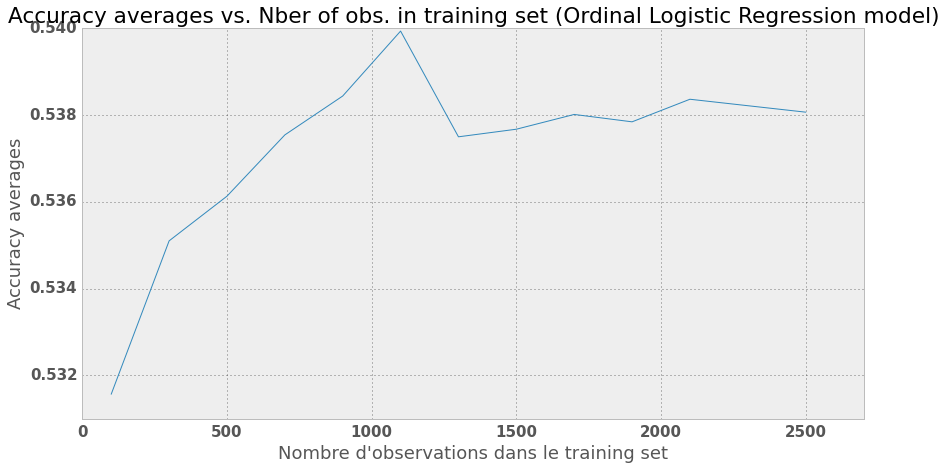

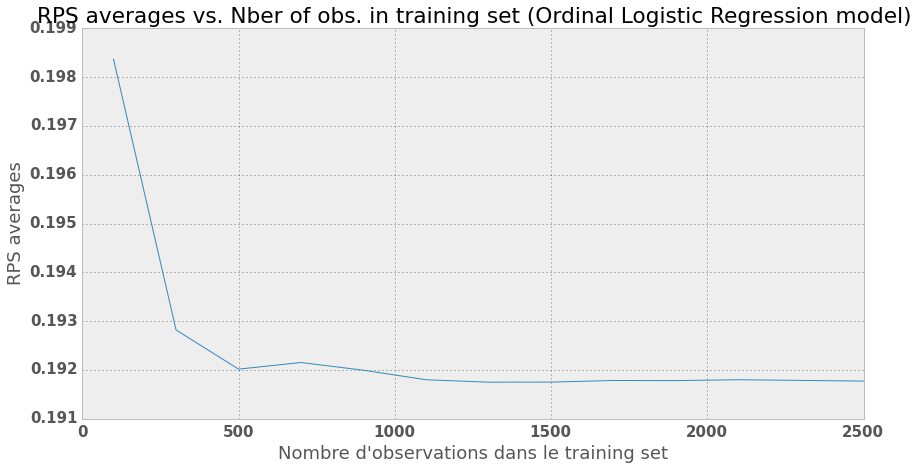

In [57]:
accuracies = [0.531569604446, 0.535100326873, 0.536129916874, 0.537541471298,
              0.538437618599, 0.539933645924, 0.537497398479,
              0.537672465507, 0.538012805602, 0.537842635555,0.538362939657, 0.538065448135]
rps_scores = [0.198360228197, 0.192819551179, 0.192017259516,
                0.192152652066, 0.19199519658, 0.191799709192, 0.191750042744,
                0.191752130925, 0.191784696514, 0.191782256614, 0.191800157563, 0.191772371404]

NObsMaxList = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2500]

plt.figure()
plt.plot(NObsMaxList, accuracies, label="Accuracy")
plt.xlim((0,2700))
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("Accuracy averages")
plt.title("Accuracy averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

plt.figure()
plt.plot(NObsMaxList, rps_scores, label="RPS")
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("RPS averages")
plt.title("RPS averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

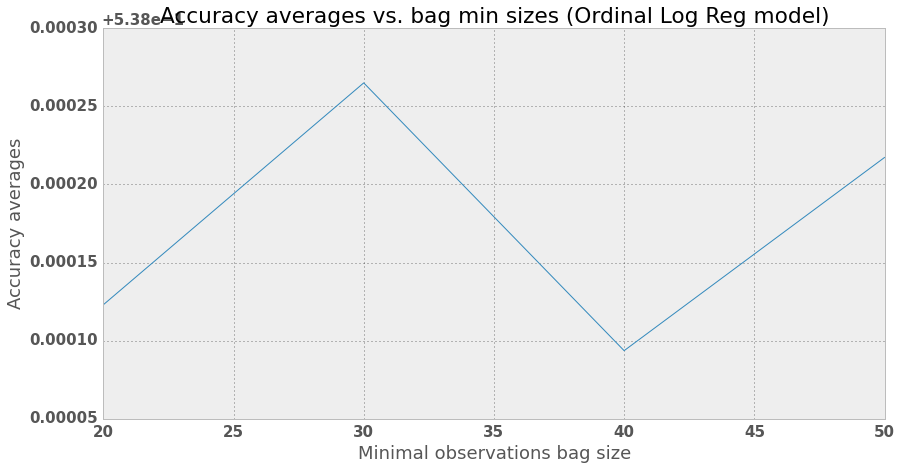

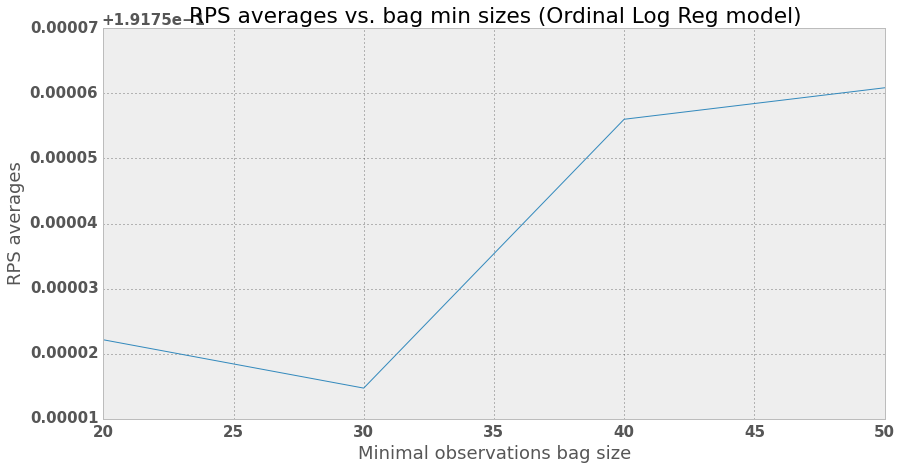

In [64]:
accuracies = [0.538122987647, 0.538265000061, 0.538093605769, 0.538217254508]
rps_scores = [0.191772138223, 0.19176471446, 0.191806011376, 0.191810844913]

foldMinSizeList = [20, 30, 40, 50]

plt.figure()
plt.plot(foldMinSizeList, accuracies, label="Accuracy")
plt.xlabel("Minimal observations bag size")
plt.ylabel("Accuracy averages")
plt.title("Accuracy averages vs. bag min sizes (Ordinal Log Reg model)")

plt.figure()
plt.plot(foldMinSizeList, rps_scores, label="RPS")
plt.xlabel("Minimal observations bag size")
plt.ylabel("RPS averages")
plt.title("RPS averages vs. bag min sizes (Ordinal Log Reg model)")

Parameters optimization

In [ ]:
#fixed parameters
fitPredFun = ordinalLogRegfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]
classFeature = 'HR'
featuresPool = ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate']
foldGenParams = {'foldMinSize': 40, 'foldMaxSize': 55, 'trInitSize': 680}
fittingParams = {'penalty': 'l1', 'solver': 'liblinear'}

#moving parameters
fittingParamRanges = {'C1': [0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 35], 
                      'C2':  [0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 35],
                      'penalty': ['l1', 'l2']}

fittingparams_olr_scores_dict = {}
for penalty in fittingParamRanges['penalty']:
    fittingParams['penalty'] = penalty

    for C1 in fittingParamRanges['C1']:
        fittingParams['C1'] = C1

        for C2 in fittingParamRanges['C2']:
            fittingParams['C2'] = C2
            
            avScores = np.zeros(3 + len(scoreFunList))
            for j in range(0,10):
                avScores = avScores + crossValidation(predictors, labels, classLabels, 
                                     foldGenParams, fitPredFun, fittingParams, 
                                     scoreFunList, NObsMax = -1)
        
            avScores = avScores/float(10)
            fittingparams_olr_scores_dict[(penalty, C1, C2)] = avScores

### Random Forrest Classifier

To capture other than linear and additive patterns in the data gathered, I thought that Random Forrest could be an interesting classifier for this problem. Sckikit-learn implementation of the Random Forrest provides also the predicted probabilities associated to each class.

In [78]:
from sklearn.ensemble import RandomForestClassifier

def randomForrestfitPred(trPredictors, trLabels, valPredictors, valLabels, fittingParams):
    
    #no scaling necessary
    #scaler = preprocessing.StandardScaler().fit(trPredictors)

    rfFit = RandomForestClassifier(n_estimators=fittingParams['n_estimators'],
                                   min_samples_split = fittingParams['min_samples_split'],
                                   min_samples_leaf = fittingParams['min_samples_leaf'])
    
    rfFit.fit(trPredictors.values, trLabels.values)
    classes = rfFit.classes_
    predLabels = rfFit.predict(valPredictors)
    probs = rfFit.predict_proba(valPredictors)
    probW = probs[:,2]
    probL = probs[:,1]
    probD = probs[:,0]
    
    return (predLabels, probW, probL, probD)

In [81]:
#fixed parameters
classFeature = 'HR'
foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 680}
fitPredFun = randomForrestfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]
featuresPool = ['gammaHome', 'HTW_rate', 'HTL_rate',  
                'ATW_rate', 'ATL_rate', 
                '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL',
                '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL',
               '1_last_HTHR_isW', '1_last_HTHR_isL', '1_last_ATAR_isW', '1_last_ATAR_isL',
               '7_HTW_rate', '7_ATW_rate', '7_HTL_rate', '7_ATL_rate', '5_HTHW_rate', '5_ATAW_rate']

fittingParamRanges = {'n_estimators': [50, 100, 200, 500, 1000], 
                      'min_samples_split': [15],
                      'min_samples_leaf': [4]}
fittingParams = {'min_samples_leaf': 4}

accuracy_scores = []
rps_scores = []
i = 0
#fittingParams = {'min_samples_leaf': 4, 'min_samples_leaf':15}
for n_estimators in fittingParamRanges['n_estimators']:
    fittingParams['n_estimators'] = n_estimators 
    for min_samples_split in fittingParamRanges['min_samples_split']:
        fittingParams['min_samples_split'] = min_samples_split
        avScores = np.zeros(3 + len(scoreFunList))
        for j in range(0,10):
            scores = crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax=-1)
            avScores = avScores + scores
        avScores = avScores/float(10)
        accuracy_scores.append(avScores[0])
        rps_scores.append(avScores[3])

KeyboardInterrupt: 

In [ ]:
rfClf.feature_importances_

# IV\ Results

## Expected errors estimation

## Prediction over test set

In [69]:
def predict(predictors, labels, trIndex, testIndex, fitPredFun, fittingParams, NObsMax, scoreFunList, classLabels):
    
    currentTrSubset = trIndex
    obsIndex = testIndex[0:1]
    k=0
    accuracy = 0.0
    rps = 0.0
    
    for i in range(1, len(testIndex)) :
        
        if (NObsMax != (-1)):
            currentTrSubset = currentTrSubset[-NObsMax:]
            
        predictors_tr = predictors.loc[currentTrSubset,:]
        predictors_eval = predictors.loc[obsIndex,:]
        labels_tr = labels.loc[currentTrSubset]
        labels_eval = labels.loc[obsIndex]

        #model fitting + probabilities prediction
        (predLabels, probW, probL, probD) = fitPredFun(predictors_tr, labels_tr, predictors_eval, labels_eval, fittingParams)
        
        if predLabels[0] == labels_eval.values[0]:
            accuracy += 1.0
                
        t1 = (1 if labels_eval.values[0] == 'L' else 0)
        t2 = (1 if ((labels_eval.values[0] == 'L') | (labels_eval.values[0] == 'D')) else 0)
        rps += 0.5 * ((t1 - probL[0]) ** 2 + (t2 - (probL[0] + probD[0])) ** 2)            
        
        #update currentTrSubset and obsIndex
        currentTrSubset.append(obsIndex)
        obsIndex = testIndex[i:i+1]
        k += 1
        
    return (accuracy/len(testIndex), rps/len(testIndex))

In [ ]:
classFeature = 'HR'
classLabels = {'W' : 'W', 'L': 'L', 'D': 'D'}
foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 680}
NObsMax = -1
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[((E0_data['Season'].isin(trainingSeasons)) | (E0_data['Season'].isin(testSeasons))) 
            & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), :]
labels = E0_data.loc[((E0_data['Season'].isin(trainingSeasons)) | (E0_data['Season'].isin(testSeasons))) 
            & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), 'HR']

trIndex = predictors[predictors['Season'].isin(trainingSeasons)].index
testIndex = predictors[predictors['Season'].isin(testSeasons)].index

#multilabel logistic regression model
fitPredFun = simpleLogRegfitPred
featuresPool = ['gammaHome', 
                'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate', 
                'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate']
fittingParams = {'penalty': 'l1', 'C': 1, 'multi_class':'multinomial', 'solver': 'lbfgs'}
predictors = predictors.loc[:,featuresPool]
(multilogreg_acc, multilogreg_rps) = predict(predictors, labels, trIndex, testIndex, fitPredFun, fittingParams, NObsMax, scoreFunList, classLabels)

#ordinal logistic regression model
fitPredFun = ordinalLogRegfitPred
featuresPool = ['gammaHome', 
                'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate', 
                'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate']
fittingParams = {'penalty': 'l1', 'C1': 20, 'C2': 20, 'multi_class':'multinomial', 'solver': 'liblinear'}
predictors = predictors.loc[:,featuresPool]
(ordinallogreg_acc, ordinallogreg_rps) = predict(predictors, labels, trIndex, testIndex, fitPredFun, fittingParams, NObsMax, scoreFunList, classLabels)
#random forrest model
fitPredFun = randomForrestfitPred
featuresPool = ['gammaHome', 
                'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate', 
                'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate']
fittingParams = {'n_estimators': 500, 
                'min_samples_split': 15,
                'min_samples_leaf': 4}
predictors = predictors.loc[:,featuresPool]
(rf_acc, rf_rps) = predict(predictors, labels, trIndex, testIndex, fitPredFun, fittingParams, NObsMax, scoreFunList, classLabels)

print(multilogreg_acc, multilogreg_rps)
print(ordinallogreg_acc, ordinallogreg_rps)
print(rf_acc, rf_rps)